Importing all required packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading the data

In [8]:
dbts = pd.read_csv("/content/diabetes.csv")

checking data

In [6]:
dbts.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
dbts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


checking if there are any nulls in data

In [10]:
dbts.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


A)

setting a seed value

In [11]:
np.random.seed(10)

Taking a sample 0f 25 observations

In [12]:
sample = dbts.sample(25)

calculating mean and max values for sample and population

In [13]:
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()
population_mean_glucose = dbts['Glucose'].mean()
population_highest_glucose = dbts['Glucose'].max()

comparing the both mean and highest value of glucose between sample and population

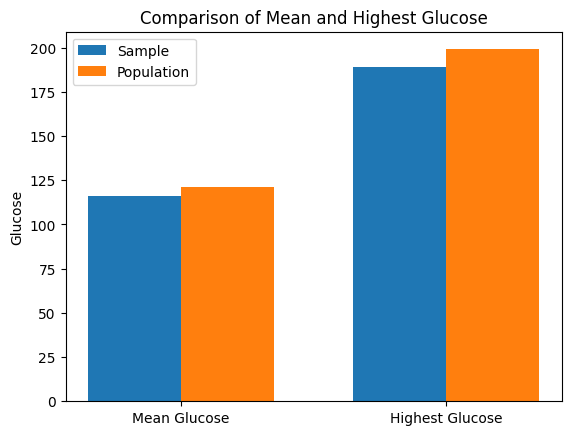

In [14]:
labels = ['Mean Glucose', 'Highest Glucose']

sample_stats = [sample_mean_glucose, sample_highest_glucose]
population_stats = [population_mean_glucose, population_highest_glucose]

bar_positions = np.arange(len(labels))

plt.bar(bar_positions, sample_stats, width=0.35, label='Sample')
plt.bar(bar_positions + 0.35, population_stats, width=0.35, label='Population')

plt.xticks(bar_positions + 0.35 / 2, labels)
plt.legend()
plt.title('Comparison of Mean and Highest Glucose')
plt.ylabel('Glucose')
plt.show()

Findings
after observing the bar graph we can clearly say that there is slight differnce between sample and population for the both mean and highest

B)

calculating 98th percentile for BMI

In [15]:
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
population_98th_percentile_bmi = np.percentile(dbts['BMI'], 98)

plotting the comparision between sample and population data for 98th percentile of BMI using row chart

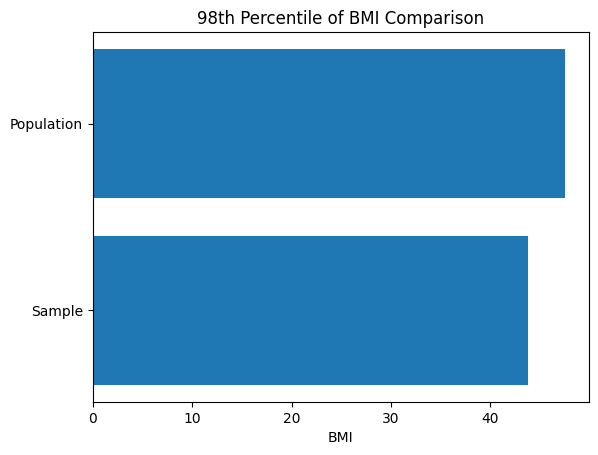

In [16]:
plt.barh(['Sample', 'Population'], [sample_98th_percentile_bmi, population_98th_percentile_bmi])
plt.title('98th Percentile of BMI Comparison')
plt.xlabel('BMI')
plt.show()

**Findings:**
when comparing 98th percentile of BMI i observed that  there is clear difference between population and sample

C)

bottstraping

In [17]:
bootstrap_samples = [dbts['BloodPressure'].sample(150, replace=True) for _ in range(500)]

calculating mean , standard deviation and 98th percentile for bootstraped data

In [18]:
bootstrap_means = [sample.mean() for sample in bootstrap_samples]
bootstrap_std_devs = [sample.std() for sample in bootstrap_samples]
bootstrap_95th_percentiles = [np.percentile(sample, 95) for sample in bootstrap_samples]

In [19]:
population_mean_bp = dbts['BloodPressure'].mean()
population_std_dev_bp = dbts['BloodPressure'].std()
population_95th_percentile_bp = np.percentile(dbts['BloodPressure'], 95)

plotting comprasion

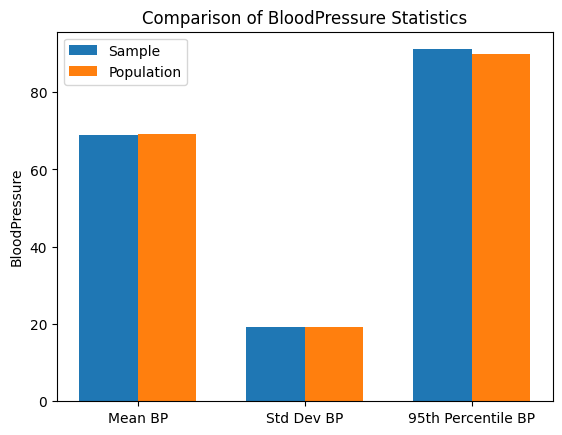

In [21]:
labels = ['Mean BP', 'Std Dev BP', '95th Percentile BP']

sample_stats = [np.mean(bootstrap_means), np.mean(bootstrap_std_devs), np.mean(bootstrap_95th_percentiles)]
population_stats = [population_mean_bp, population_std_dev_bp, population_95th_percentile_bp]

bar_width = 0.35
bar_positions_sample = np.arange(len(labels))
bar_positions_population = bar_positions_sample + bar_width

plt.bar(bar_positions_sample, sample_stats, width=bar_width, label='Sample')
plt.bar(bar_positions_population, population_stats, width=bar_width, label='Population')

plt.xticks(bar_positions_sample + bar_width / 2, labels)
plt.legend()
plt.title('Comparison of BloodPressure Statistics')
plt.ylabel('BloodPressure')
plt.show()

**Findings**

after bootsraping we can clearly see that both sample and population of  Mean of Blood Pressure , standard deviation of BP are almost same and 95th percentile has little differnce still better than random sample vs population comparsion so this clearly shows that bootsrapping works better than random sampling to make a decision on data